<a href="https://colab.research.google.com/github/daeolian/Python_Example/blob/main/Simul_PsychoMetricFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

Environment variables

In [ ]:
n_subj        = 100
n_samp_time   = 10 # Sample number of measurement(subject)
dur_samp_time = 10 # Temporal duration
axis_time     = np.linspace(start=1, stop = dur_samp_time, num = n_samp_time)
n_trial_p_samp = 100 # Trial number for sample(time)
#
n_samp_space = 5
axis_resp   = np.linspace(start=-1, stop = 1, num = n_samp_space)

axis_resp_interp = np.linspace(start=-1, stop = 1, num = 100)

True param of response model 

In [ ]:
val_param_mu_base = 0
val_param_sig_base = 1

True model: Effect of treatment<br>
Bias:= Value for 50% response probability

In [ ]:
val_slope_eff = 0.1 # Increase of Bias per Time

Visualization

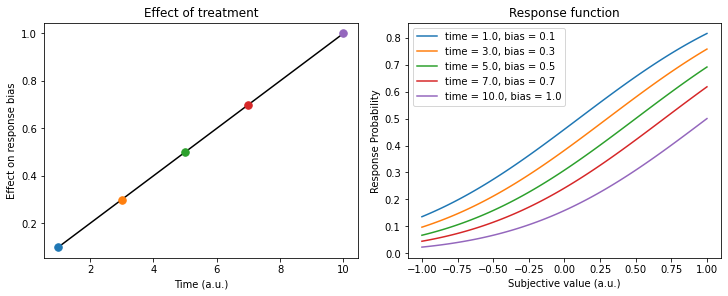

In [ ]:
# Plot variables
vec_plot_x = axis_time
vec_plot_y = val_param_mu_base + val_slope_eff * axis_time
# Example plot
fig, axs = plt.subplots(1,2, constrained_layout=True)
fig.set_figwidth(10)
#
n_samp_plot = 5
list_samp_plot = np.linspace(start=0, stop = n_samp_time-1, num = n_samp_plot)
list_samp_plot = list_samp_plot.astype(int)
#
axs[0].plot(axis_time, vec_plot_y,'k-')
for val_x, val_y in zip(axis_time[list_samp_plot], vec_plot_y[list_samp_plot]):
    axs[0].plot(val_x, val_y,'.', markersize = 15) 
#
axs[0].set_xlabel('Time (a.u.)')
axs[0].set_ylabel('Effect on response bias')
axs[0].set_title('Effect of treatment')
#
vec_plot_mu = val_param_mu_base + vec_plot_y[list_samp_plot]
vec_plot_x = axis_resp_interp
# Plot the lines
for val_mu, val_x in zip(vec_plot_mu, axis_time[list_samp_plot]):
    axs[1].plot(vec_plot_x, stats.norm.cdf(vec_plot_x, val_mu, val_param_sig_base), label=f"time = {val_x}, bias = {float(val_mu):,.1f}")

axs[1].set_xlabel('Subjective value (a.u.)')
axs[1].set_ylabel('Response Probability')
axs[1].set_title('Response function')
axs[1].legend();

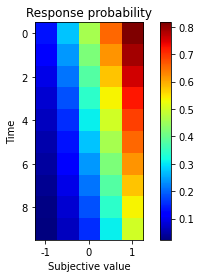

In [ ]:
mat_data_prob = np.empty( (n_samp_time, n_samp_space) )
mat_data_prob[:] = np.nan
for i_time in range(0,n_samp_time):
  val_time = axis_time[i_time]
  val_mu = val_param_mu_base + val_slope_eff * val_time
  mat_data_prob[i_time,:] = stats.norm.cdf(axis_resp, val_mu, val_param_sig_base)

img_in = plt.imshow(mat_data_prob, cmap='jet')
plt.title('Response probability')
plt.xlabel('Subjective value')
plt.ylabel('Time')
plt.xticks([0,2,4],['-1','0','1']);
plt.colorbar(img_in);

Generate simulation data

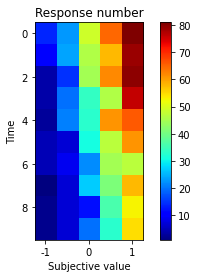

In [ ]:
# Set the probability of success and number of trials

n = n_trial_p_samp * np.ones( mat_data_prob.shape )
n = n.astype(int)

# Generate the random sample
mat_data_sim = np.random.binomial(n=n, p=mat_data_prob)

# Print the sample
img_in = plt.imshow(mat_data_sim, cmap='jet')
plt.title('Response number')
plt.xlabel('Subjective value')
plt.ylabel('Time')
plt.xticks([0,2,4],['-1','0','1']);
plt.colorbar(img_in);

Fitting response function model 

In [ ]:
vec_param_guess = [0, 1]
mat_param_fit = np.empty( (n_samp_time, 2) )
for i_time in range(0,n_samp_time):
  params, _ = curve_fit( stats.norm.cdf, axis_resp, mat_data_sim[i_time,:]/n_trial_p_samp, vec_param_guess)
  mat_param_fit[i_time,:] = params;

Visualization

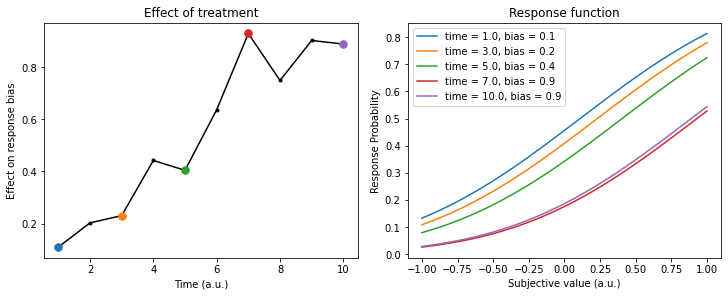

In [ ]:
# Plot variables
vec_plot_x = axis_time
vec_plot_y = mat_param_fit[:,0]
# Example plot
fig, axs = plt.subplots(1,2, constrained_layout=True)
fig.set_figwidth(10)
#
n_samp_plot = 5
list_samp_plot = np.linspace(start=0, stop = n_samp_time-1, num = n_samp_plot)
list_samp_plot = list_samp_plot.astype(int)
#
axs[0].plot(axis_time, vec_plot_y,'k.-')
for val_x, val_y in zip(axis_time[list_samp_plot], vec_plot_y[list_samp_plot]):
    axs[0].plot(val_x, val_y,'.', markersize = 15) 
#
axs[0].set_xlabel('Time (a.u.)')
axs[0].set_ylabel('Effect on response bias')
axs[0].set_title('Effect of treatment')
#
vec_plot_mu = val_param_mu_base + vec_plot_y[list_samp_plot]
vec_plot_x = axis_resp_interp
# Plot the lines
for val_mu, val_x in zip(vec_plot_mu, axis_time[list_samp_plot]):
    axs[1].plot(vec_plot_x, stats.norm.cdf(vec_plot_x, val_mu, val_param_sig_base), label=f"time = {val_x}, bias = {float(val_mu):,.1f}")

axs[1].set_xlabel('Subjective value (a.u.)')
axs[1].set_ylabel('Response Probability')
axs[1].set_title('Response function')
axs[1].legend();

Statistics

In [ ]:
val_slope, val_intercept, val_r, val_p, val_std_err = stats.linregress( axis_time, mat_param_fit[:,0])

Visualization

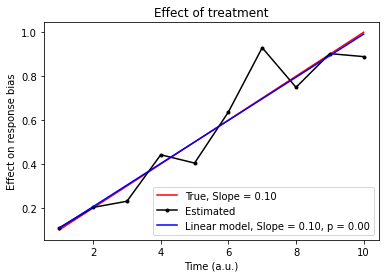

In [ ]:
# Plot true model
vec_plot_x = axis_time
vec_plot_y = val_param_mu_base + val_slope_eff * axis_time
#
plt.plot(vec_plot_x, vec_plot_y,'r-', label=f"True, Slope = {float(val_slope_eff):,.2f}")
# Plot estimated value
vec_plot_x = axis_time
vec_plot_y = mat_param_fit[:,0]
#
plt.plot(vec_plot_x, vec_plot_y,'k.-', label=f"Estimated")
# Plot linear model of effect across time
vec_plot_x = axis_time
vec_plot_y = val_intercept + val_slope * axis_time
#
plt.plot(vec_plot_x, vec_plot_y,'b-',
         label=f"Linear model, Slope = {float(val_slope):,.2f}, p = {float(val_p):,.2f}")

# Print the sample
plt.title('Effect of treatment')
plt.xlabel('Time (a.u.)')
plt.ylabel('Effect on response bias')
plt.legend();